# 0. Load Libraries

In [37]:
import numpy as np
from scipy import stats
import pandas as pd
import time
import time
#import math
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt
#import math
#test performance of 2 class vs buy and hold
import performance_2_class

In [2]:
# Sklearn
import sklearn
# Preprocessor from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Keras
import keras
# ANNs from keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout, Dense, LSTM

# Import cufflinks for visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(20,10)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Feature selection
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
#from skpp import ProjectionPursuitRegressor
#from skpp import ProjectionPursuitClassifier
# # ANNs
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model

# Model Metrics
from sklearn.metrics import accuracy_score
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Resample
# Block Bootstrap
#from arch.bootstrap import StationaryBootstrap
# Time Series cross-validation
#from sklearn.model_selection import TimeSeriesSplit

# Class encoder
#from sklearn.preprocessing import LabelEncoder 
seed_value= 4

In [3]:
pwd

'C:\\Users\\pcalatayud\\Desktop\\jupyter\\TFM\\ML\\Load_data_and_run_ML_models\\2_Class\\mechine_learning_classic'

# 1. Load data

In [4]:
path = "C:\\Users\\pcalatayud\\Desktop\\jupyter\\TFM\\ML\\Transformation\\Data_Transformed_2_Class\\"

In [5]:
name = "2_CLASS_DF_CURATED_2022_12_7_11.csv"

In [6]:
file = path + name
file

'C:\\Users\\pcalatayud\\Desktop\\jupyter\\TFM\\ML\\Transformation\\Data_Transformed_2_Class\\2_CLASS_DF_CURATED_2022_12_7_11.csv'

In [7]:
df = pd.read_csv(file, index_col=0)

In [8]:
df.iloc[0:10,0:6]

,Y_label,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns
Date,,,,,,
2002-07-18,0,-0.038352,-0.026385,881.559998,1736300000,0.026739
2002-07-19,0,-0.032922,-0.038352,847.750000,2654100000,0.039107
2002-07-22,0,-0.027017,-0.032922,819.849976,2248060000,0.033476
2002-07-23,1,0.057314,-0.027017,797.700012,2441020000,0.027389
2002-07-24,0,-0.005620,0.057314,843.429993,2775560000,-0.055732
2002-07-25,1,0.016884,-0.005620,838.679993,2424700000,0.005636
2002-07-26,1,0.054078,0.016884,852.840027,1796100000,-0.016743
2002-07-29,1,0.004249,0.054078,898.960022,1778650000,-0.052667
2002-07-30,1,0.009792,0.004249,902.780029,1826090000,-0.004240


# 2. Splitting data in training and test

In [9]:
X = df.copy()

In [10]:
X.head(4)

,Y_label,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-18,0,-0.038352,-0.026385,881.559998,1736300000,0.026739,3,29,7,0.030888,...,-0.002273,-0.000765,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-20.428083,24.627836
2002-07-19,0,-0.032922,-0.038352,847.750000,2654100000,0.039107,4,29,7,0.046896,...,0.048051,0.002408,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-22.343688,21.351079
2002-07-22,0,-0.027017,-0.032922,819.849976,2248060000,0.033476,0,30,7,0.050255,...,0.070023,0.003929,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-24.872814,20.786866
2002-07-23,1,0.057314,-0.027017,797.700012,2441020000,0.027389,1,30,7,0.039642,...,0.062692,0.007462,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-27.915234,20.657899


In [11]:
Y_real = X["Y_label"]
returns_real = X["Y_next_daily_returns"]

In [12]:
X.drop(["Y_label","Y_next_daily_returns"],1,inplace=True)

In [13]:
X.head(4)

,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,oil_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-18,-0.026385,881.559998,1736300000,0.026739,3,29,7,0.030888,0.0,-0.005411,...,-0.002273,-0.000765,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-20.428083,24.627836
2002-07-19,-0.038352,847.750000,2654100000,0.039107,4,29,7,0.046896,0.0,0.021284,...,0.048051,0.002408,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-22.343688,21.351079
2002-07-22,-0.032922,819.849976,2248060000,0.033476,0,30,7,0.050255,0.0,-0.022777,...,0.070023,0.003929,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-24.872814,20.786866
2002-07-23,-0.027017,797.700012,2441020000,0.027389,1,30,7,0.039642,0.0,-0.017183,...,0.062692,0.007462,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-27.915234,20.657899


In [14]:
# 70% train/test split
split = int(len(X) * 0.7)
Y=Y_real
# We transform Y to a binary classification problem's values (0 y 1)
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 
encoder.fit(Y) 
encoded_Y = encoder.transform(Y) 
# We transform encoded_Y into a dataframe in order to use .iloc and being able to make the train/test split
Y = pd.DataFrame(encoded_Y, columns = ['Column_A'],index=Y.index) 

# Create train data set
# We have to twist the dataset
X_train, y_train = X[:split], Y[:split]
# Test data after train split
# PARA EVITAR CORRELACION ENTRE LAS SERIES PODEMOS TOMAR [SPLIT+3:] ie QUE PREDIGA 3 DIAS ADELANTE DEL TRAIN SET
X_test, y_test = X[split:], Y[split:]


# Scale the features MinMax for training and test datasets
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
# We change from array to dataframe
X_train=pd.DataFrame(scaled_X_train,columns=X.columns,index=X.iloc[:split].index)
y_train=pd.DataFrame(y_train,columns=Y.columns,index=Y[:split].index)
X_test=pd.DataFrame(scaled_X_test,columns=X.columns,index=X[split:].index)
y_test=pd.DataFrame(y_test,columns=Y.columns,index=Y[split:].index)

In [15]:
runtimes=[]

# 3. Running Models

# 1. Naive Bayes

In [45]:
mnb = MultinomialNB()

start_mnb = time.time()
mnb.fit(X_train, y_train)
end_mnb = time.time()
mnb_runtime=end_mnb - start_mnb

print('Runtime:',mnb_runtime)
print("score on test: %.3f"  %mnb.score(X_test, y_test))
print("score on train: %.3f" %mnb.score(X_train, y_train))

Runtime: 0.003998756408691406
score on test: 0.544
score on train: 0.543


In [46]:
runtimes.append(mnb_runtime)

In [47]:
runtimes

[0.011967897415161133,
 0.04339313507080078,
 0.0029594898223876953,
 0.2513594627380371,
 0.003998756408691406]

In [48]:
#coef=list(mnb.fit(X_train, y_train).coef_[0])
#max_coef_index=list(np.argsort(coef)[::-1])
#for i in max_coef_index:
#    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

# 2. Logistic Regression

In [49]:
lr=LogisticRegression(max_iter=1000)

start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()
lr_runtime=end_lr - start_lr

print('Runtime:',lr_runtime)
print("score on test: %.3f" % lr.score(X_test, y_test))
print("score on train: %.3f" % lr.score(X_train, y_train))

Runtime: 0.03789806365966797
score on test: 0.516
score on train: 0.560


In [50]:
runtimes.append(lr_runtime)

In [51]:
coef=list(lr.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

GDP --> 0.695
IPMAN --> 0.678
PCE --> 0.472
UMCSENT --> 0.470
Volume --> 0.463
log_daily_returns --> 0.456
treasury_10y_returns --> 0.247
month-of-year --> 0.185
day_volatility_% --> 0.063
US_returns --> -0.027
day-of-week --> -0.081
Close --> -0.129
VIX_returns --> -0.138
treasury_13w_returns --> -0.142
nasdaq_returns --> -0.179
week-of-year --> -0.197
RSI --> -0.234
gold_returns --> -0.234
oil_returns --> -0.251
dowJones_returns --> -0.381
simple_daily_returns --> -0.446
CPILFESL --> -0.461
MACD_Signal --> -0.472
INDPRO --> -0.899


# 3. K-nearest Neighbours

In [52]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

start_knn = time.time()
knn.fit(X_train, y_train)
end_knn = time.time()
knn_runtime=end_knn - start_knn

print('Runtime:',knn_runtime)
print("score on test: %.3f" % knn.score(X_test, y_test))
print("score on train: %.3f" % knn.score(X_train, y_train))

Runtime: 0.004987955093383789
score on test: 0.492
score on train: 0.698


In [53]:
runtimes.append(knn_runtime)

# 4. Support Vector Machine (SVM)

In [54]:
svm=LinearSVC(C=100)

start_svm = time.time()
svm.fit(X_train, y_train)
end_svm = time.time()
svm_runtime=end_svm - start_svm

print('Runtime:',svm_runtime)
print("score on test: %.3f" % svm.score(X_test, y_test))
print("score on train: %.3f" % svm.score(X_train, y_train))

Runtime: 0.25830888748168945
score on test: 0.545
score on train: 0.545


In [55]:
runtimes.append(svm_runtime)

In [56]:
coef=list(svm.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

log_daily_returns --> 1.030
IPMAN --> 0.399
month-of-year --> 0.305
treasury_13w_returns --> 0.197
Volume --> 0.197
GDP --> 0.174
VIX_returns --> 0.145
treasury_10y_returns --> 0.141
UMCSENT --> 0.134
PCE --> 0.124
Close --> 0.040
day-of-week --> -0.083
nasdaq_returns --> -0.084
RSI --> -0.099
simple_daily_returns --> -0.110
dowJones_returns --> -0.129
day_volatility_% --> -0.156
week-of-year --> -0.173
oil_returns --> -0.206
MACD_Signal --> -0.208
US_returns --> -0.229
INDPRO --> -0.404
CPILFESL --> -0.408
gold_returns --> -0.426


# 5. Decision Tree Classifier

In [57]:
clf = DecisionTreeClassifier(max_depth=5)

start_clf = time.time()
clf.fit(X_train, y_train)
end_clf = time.time()
clf_runtime=end_clf - start_clf

print('Runtime:',clf_runtime)
print("score on test: %.3f"  % clf.score(X_test, y_test))
print("score on train: %.3f" % clf.score(X_train, y_train))

Runtime: 0.030919551849365234
score on test: 0.511
score on train: 0.601


In [58]:
runtimes.append(clf_runtime)

In [59]:
coef=list(clf.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

treasury_10y_returns --> 0.184
VIX_returns --> 0.125
nasdaq_returns --> 0.122
MACD_Signal --> 0.097
Volume --> 0.092
treasury_13w_returns --> 0.084
Close --> 0.083
RSI --> 0.063
day_volatility_% --> 0.054
oil_returns --> 0.043
GDP --> 0.033
log_daily_returns --> 0.019
US_returns --> 0.000
dowJones_returns --> 0.000
CPILFESL --> 0.000
PCE --> 0.000
UMCSENT --> 0.000
gold_returns --> 0.000
month-of-year --> 0.000
week-of-year --> 0.000
day-of-week --> 0.000
INDPRO --> 0.000
IPMAN --> 0.000
simple_daily_returns --> 0.000


# 6. Bagging Decision Tree (Ensemble Learning I)

In [60]:
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(max_depth=5),max_samples=0.50,max_features=0.75,n_estimators=20)

start_bg = time.time()
bg.fit(X_train, y_train)
end_bg = time.time()
bg_runtime=end_bg - start_bg

print('Runtime:',bg_runtime)
print("score on test: %.3f" % bg.score(X_test, y_test))
print("score on train: %.3f" % bg.score(X_train, y_train))

Runtime: 0.16655492782592773
score on test: 0.476
score on train: 0.647


In [61]:
runtimes.append(bg_runtime)

# 7. Boosting Decision Tree (Ensemble Learning II)

In [62]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=7),n_estimators=10,learning_rate=0.6)

start_adb = time.time()
adb.fit(X_train, y_train)
end_adb = time.time()
adb_runtime=end_adb - start_adb

print('Runtime:',adb_runtime)
print("score on test: %.3f" % adb.score(X_test, y_test))
print("score on train: %.3f" % adb.score(X_train, y_train))

Runtime: 0.33513641357421875
score on test: 0.520
score on train: 0.900


In [63]:
coef=list(adb.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

oil_returns --> 0.085
treasury_10y_returns --> 0.067
MACD_Signal --> 0.063
RSI --> 0.062
VIX_returns --> 0.060
Close --> 0.059
day_volatility_% --> 0.058
US_returns --> 0.058
dowJones_returns --> 0.058
gold_returns --> 0.056
Volume --> 0.055
nasdaq_returns --> 0.052
treasury_13w_returns --> 0.047
CPILFESL --> 0.042
IPMAN --> 0.033
log_daily_returns --> 0.025
week-of-year --> 0.020
PCE --> 0.019
GDP --> 0.017
simple_daily_returns --> 0.015
day-of-week --> 0.015
INDPRO --> 0.015
UMCSENT --> 0.012
month-of-year --> 0.007


# 8. Random Forest (Ensemble Learning III)

In [64]:
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)

start_rf = time.time()
rf.fit(X_train, y_train)
end_rf = time.time()
rf_runtime=end_rf - start_rf

print('Runtime:',rf_runtime)
print("score on test: %.3f" % rf.score(X_test, y_test))
print("score on train: %.3f" % rf.score(X_train, y_train))

Runtime: 0.16752123832702637
score on test: 0.468
score on train: 0.845


In [65]:
runtimes.append(rf_runtime)

In [66]:
coef=list(rf.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Close --> 0.061
VIX_returns --> 0.056
oil_returns --> 0.056
treasury_10y_returns --> 0.055
gold_returns --> 0.053
US_returns --> 0.052
day_volatility_% --> 0.052
nasdaq_returns --> 0.051
RSI --> 0.051
MACD_Signal --> 0.047
Volume --> 0.043
log_daily_returns --> 0.043
dowJones_returns --> 0.043
treasury_13w_returns --> 0.042
simple_daily_returns --> 0.040
INDPRO --> 0.039
week-of-year --> 0.034
PCE --> 0.033
CPILFESL --> 0.032
GDP --> 0.031
UMCSENT --> 0.030
IPMAN --> 0.027
month-of-year --> 0.016
day-of-week --> 0.013


# 10. Voting Classifier (Ensemble Learning IV)

In [164]:

# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('clf',clf),('lr',lr),('rf',rf)],voting='hard')

start_evc = time.time()
evc.fit(X_train, y_train)
end_evc = time.time()
evc_runtime=end_evc - start_evc

print('Runtime:',evc_runtime)
print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

Runtime: 0.29325222969055176
score on test: 0.5096989966555184
score on train: 0.7217441193344808


# 11. Redes neuronales y Deep Learning

In [67]:
# MLP: mirar https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/ + https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# define model

def model_MLP(optimizer,activation,loss,metrics):
    model = Sequential()

    model.add(Dense(64,  activation = activation))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

MLP=model_MLP(optimizer='adam',activation='relu',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [68]:
start_MLP = time.time()
history_MLP=MLP.fit(X_train, y_train, batch_size=1, epochs=100, verbose=0, validation_split=0.33, shuffle=False)
end_MLP = time.time()
MLP_runtime=end_MLP - start_MLP

print('Runtime:',MLP_runtime)

Runtime: 243.41211318969727


In [69]:
runtimes.append(MLP_runtime)

In [70]:
print(MLP.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 64)                   1600      
                                                                 
 dense_1 (Dense)             (1, 1)                    65        
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________
None


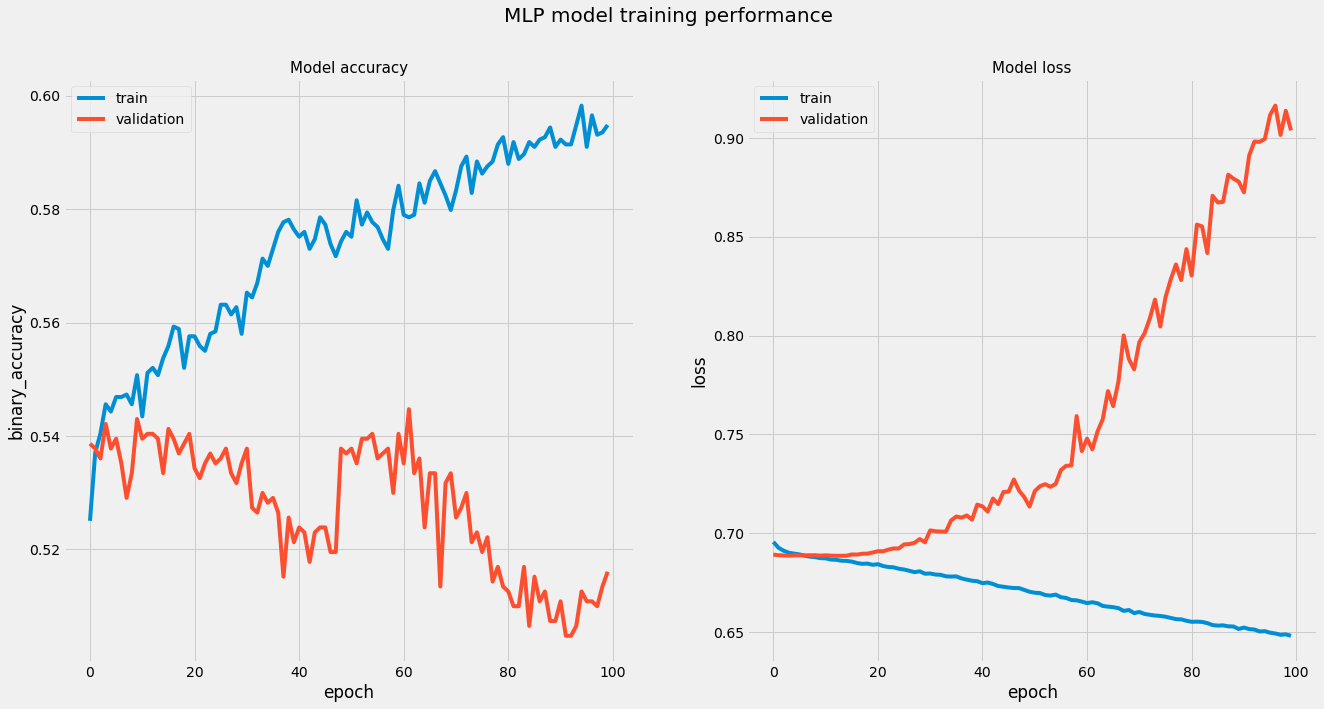

In [71]:
# MLP
fig, axs = plt.subplots(1,2)
fig.suptitle('MLP model training performance', fontsize=20)
axs[0].plot(history_MLP.history['binary_accuracy'])
axs[0].plot(history_MLP.history['val_binary_accuracy'])
axs[0].set_title('Model accuracy', fontsize=15)
axs[0].set_ylabel('binary_accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(history_MLP.history['loss'])
axs[1].plot(history_MLP.history['val_loss'])
axs[1].set_title('Model loss', fontsize=15)
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')
plt.show()

In [72]:
# MLP
results_MLP=MLP.evaluate(X_train, y_train)
print('MLP: [binary_crossentropy, binary_accuracy] =', results_MLP)

109/109 [==============================] - 0s 1ms/step - loss: 0.7315 - binary_accuracy: 0.5709
MLP: [binary_crossentropy, binary_accuracy] = [0.7314605712890625, 0.5708548426628113]


In [73]:
# MLP
results_MLP=MLP.evaluate(X_test, y_test)
print('MLP: [binary_crossentropy, binary_accuracy] =', results_MLP)

47/47 [==============================] - 0s 1ms/step - loss: 4.5458 - binary_accuracy: 0.4676
MLP: [binary_crossentropy, binary_accuracy] = [4.545845985412598, 0.46755853295326233]


# 12. LSTM

In [74]:
# Reshaping the Data for LSTM
# reshaping into 3D Array
X_train_LSTM=np.array(scaled_X_train).reshape(len(scaled_X_train),1,len(list(X.keys()))) # len(scaled_train_data) samples; 1 timesteps per sample; 9 features per timestep or 1 samples; len(scaled_train_data) timesteps; 9 features per timestep?
X_test_LSTM=np.array(scaled_X_test).reshape(len(scaled_X_test),1,len(list(X.keys())))

In [75]:
def model_LSTM_(optimizer,activation,loss,metrics):
    model = Sequential()

    model.add(LSTM(units=256, input_shape = (X_train_LSTM.shape[1],X_train_LSTM.shape[2]), return_sequences=True)) 
    model.add(Dropout(0.4, seed=seed_value))

    model.add(LSTM(units=256, return_sequences=True))
    model.add(Dropout(0.4, seed=seed_value))

    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.4, seed=seed_value))

    model.add(Dense(64,  activation = activation))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

# Define the Model
model_LSTM=model_LSTM_(optimizer='adam',activation='relu',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [76]:
start_LSTM = time.time()
history_LSTM=model_LSTM.fit(X_train_LSTM, y_train, batch_size=len(X_train_LSTM), epochs=200, verbose=0, validation_split=0.33, shuffle=False)
end_LSTM = time.time()
LSTM_runtime=end_LSTM - start_LSTM

print('Runtime:',LSTM_runtime)

Runtime: 30.874266386032104


In [77]:
runtimes.append(LSTM_runtime)

In [78]:
print(model_LSTM.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            287744    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 256)            525312    
                                                                 
 dropout_1 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)               

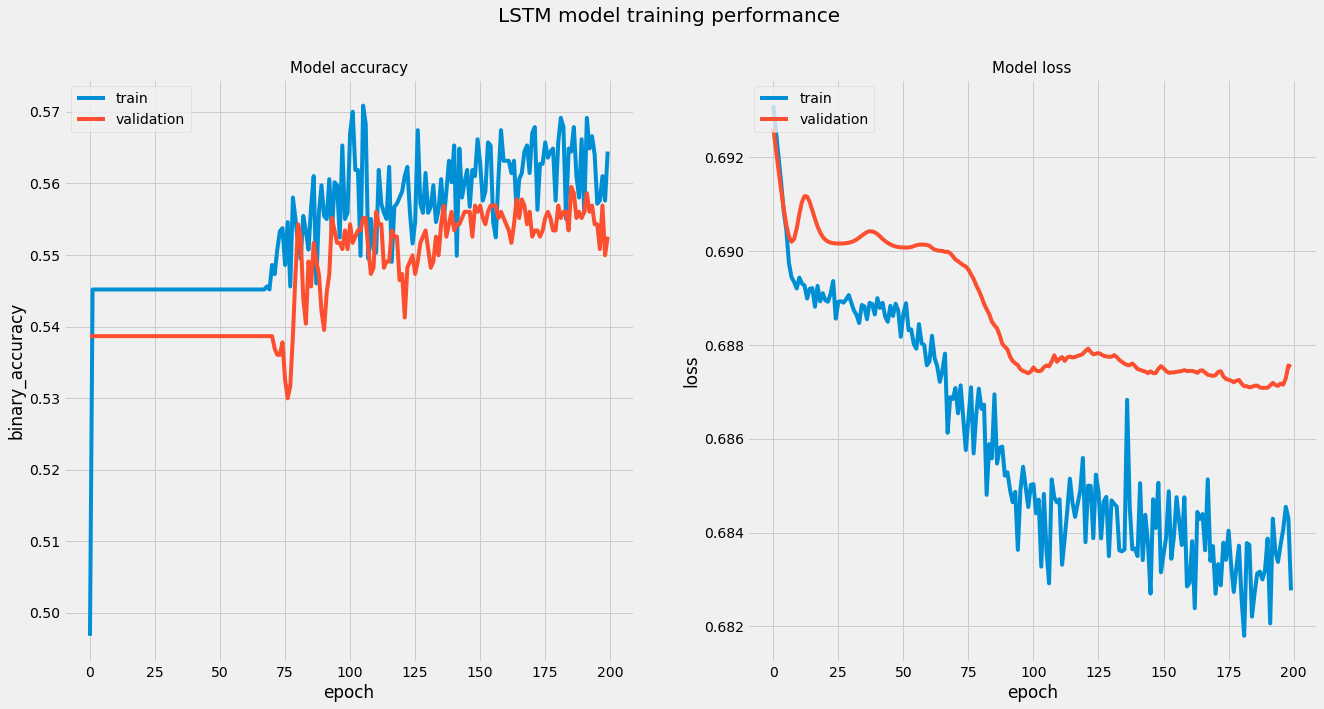

In [79]:
# LSTM
fig, axs = plt.subplots(1,2)
fig.suptitle('LSTM model training performance', fontsize=20)
axs[0].plot(history_LSTM.history['binary_accuracy'])
axs[0].plot(history_LSTM.history['val_binary_accuracy'])
axs[0].set_title('Model accuracy', fontsize=15)
axs[0].set_ylabel('binary_accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(history_LSTM.history['loss'])
axs[1].plot(history_LSTM.history['val_loss'])
axs[1].set_title('Model loss', fontsize=15)
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:
# LSTM
results_LSTM=model_LSTM.evaluate(X_train_LSTM, y_train)
print('LSTM: [binary_crossentropy, binary_accuracy] =', results_LSTM)

109/109 [==============================] - 0s 4ms/step - loss: 0.6842 - binary_accuracy: 0.5620
LSTM: [binary_crossentropy, binary_accuracy] = [0.6842123866081238, 0.5619621276855469]


In [81]:
# LSTM
results_LSTM=model_LSTM.evaluate(X_test_LSTM, y_test)
print('LSTM: [binary_crossentropy, binary_accuracy] =', results_LSTM)

47/47 [==============================] - 0s 4ms/step - loss: 0.7303 - binary_accuracy: 0.5144
LSTM: [binary_crossentropy, binary_accuracy] = [0.7303009629249573, 0.5143812894821167]


In [159]:
y_predict_array_MLP = MLP.predict(X_test_LSTM)

y_predict_array_MLP_list = y_predict_array_MLP.tolist()

y_predict_array_MLP_list = [item for sublist in y_predict_array_MLP_list for item in sublist]

y_predict_array_MLP_list = [item for sublist in y_predict_array_MLP_list for item in sublist]

y_predict_array_MLP_list_binary=[]

threshold = 0.25
for i in y_predict_array_MLP_list:
    #print(i)
    if i>threshold:
        y_predict_array_MLP_list_binary.append(1)
    else:
        y_predict_array_MLP_list_binary.append(0)
        
result = performance_2_class.performance_model(X_test,y_test,y_predict_array_MLP_list_binary,returns_real)    

Strategy Performance: 1.75
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.166
Hold and Buy Drawdown: 0.424


In [160]:
y_predict_array_LSTM = model_LSTM.predict(X_test_LSTM)

y_predict_array_LSTM_list=[]
y_predict_array_LSTM.tolist()
y_predict_array_LSTM_list = [item for sublist in y_predict_array_LSTM.tolist() for item in sublist]

y_predict_array_LSTM_list_binary=[]

threshold = 0.35
for i in y_predict_array_LSTM_list:
    if i>threshold:
        y_predict_array_LSTM_list_binary.append(1)
    else:
        y_predict_array_LSTM_list_binary.append(0)
        
result = performance_2_class.performance_model(X_test,y_test,y_predict_array_LSTM_list_binary,returns_real)    

Strategy Performance: 1.662
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.224
Hold and Buy Drawdown: 0.424


In [89]:
result = performance_2_class.performance_model(X_test,y_test,mnb.predict(X_test),returns_real)

Strategy Performance: 1.173
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.228
Hold and Buy Drawdown: 0.424


In [90]:
result = performance_2_class.performance_model(X_test,y_test,lr.predict(X_test),returns_real)

Strategy Performance: 2.029
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.221
Hold and Buy Drawdown: 0.424


In [91]:
result = performance_2_class.performance_model(X_test,y_test,knn.predict(X_test),returns_real)

Strategy Performance: 0.858
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.355
Hold and Buy Drawdown: 0.424


In [92]:
result = performance_2_class.performance_model(X_test,y_test,svm.predict(X_test),returns_real)

Strategy Performance: 0.822
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.291
Hold and Buy Drawdown: 0.424


In [93]:
result = performance_2_class.performance_model(X_test,y_test,clf.predict(X_test),returns_real)

Strategy Performance: 1.972
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.24
Hold and Buy Drawdown: 0.424


In [94]:
result = performance_2_class.performance_model(X_test,y_test,bg.predict(X_test),returns_real)

Strategy Performance: 1.24
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.234
Hold and Buy Drawdown: 0.424


In [95]:
result = performance_2_class.performance_model(X_test,y_test,adb.predict(X_test),returns_real)

Strategy Performance: 1.407
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.202
Hold and Buy Drawdown: 0.424


In [96]:
result = performance_2_class.performance_model(X_test,y_test,rf.predict(X_test),returns_real)

Strategy Performance: 1.549
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.19
Hold and Buy Drawdown: 0.424


In [165]:
result = performance_2_class.performance_model(X_test,y_test,evc.predict(X_test),returns_real)

Strategy Performance: 2.641
Hold and Buy Performance: 2.496
Strategy Maximun Drawdown: 0.121
Hold and Buy Drawdown: 0.424


In [30]:

#validation = pd.DataFrame()
#validation["returns_real_buy_hold_daily"]=X_test.Close.pct_change()
#validation["returns_open_close_daily"]=returns_real
#validation["y_test_real"]=y_test
#validation["y_test_predicted"]=y_test_predicted
#validation["action"]=validation["y_test_real"]==validation["y_test_predicted"]
#validation["position"] = np.where(validation["y_test_predicted"]<1, -1, 1 )

#validation["strategy_performance_day"] = 1 + validation.position * validation["returns_open_close_daily"]
#validation["strategy_creturns"]=validation.strategy_performance_day.cumprod()

#validation["hold_performance_day"] = 1 + validation["returns_real_buy_hold_daily"]
#validation["hold_creturns"]=validation.hold_performance_day.cumprod()